<a href="https://colab.research.google.com/github/MarkzDG/Metodos_estadisticos/blob/main/Kmeans/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Agrupamiento con Kmeans para Episodios de Los Simpsons

En este script de Google Colab, aplicaremos la metodología de Kmeans para realizar un análisis de agrupamiento de los episodios de la serie "Los Simpsons" en función de dos variables principales: las visualizaciones en la web y las calificaciones IMDb. El objetivo es identificar patrones de similitud entre los episodios y agruparlos en diferentes categorías según estas características.

Este análisis de agrupamiento nos proporcionará una nueva perspectiva sobre cómo se distribuyen los episodios en función de las visualizaciones y las calificaciones, permitiendo una mejor comprensión de los patrones y tendencias en la serie "Los Simpsons".




In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

##Carga de datos

In [2]:
!wget https://raw.githubusercontent.com/MarkzDG/Metodos_estadisticos/main/Kmeans/simpsons_episodes.csv
datos = pd.read_table('simpsons_episodes.csv', sep = ',', usecols = ['number_in_series', 'views', 'imdb_rating'])
datos.head()

--2023-08-21 19:13:16--  https://raw.githubusercontent.com/MarkzDG/Metodos_estadisticos/main/Kmeans/simpsons_episodes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127231 (124K) [text/plain]
Saving to: ‘simpsons_episodes.csv’

simpsons_episodes.c 100%[===================>] 124.25K  --.-KB/s    in 0.01s   

2023-08-21 19:13:16 (8.39 MB/s) - ‘simpsons_episodes.csv’ saved [127231/127231]



,imdb_rating,number_in_series,views
0,7.4,10,50816.0
1,8.3,12,62561.0
2,8.2,14,59575.0
3,8.1,17,64959.0
4,8.0,19,50691.0


In [3]:
datos = datos[['number_in_series', 'imdb_rating', 'views']]
datos = datos.dropna() #eliminamos filas con datos faltantes
datos.head()

,number_in_series,imdb_rating,views
0,10,7.4,50816.0
1,12,8.3,62561.0
2,14,8.2,59575.0
3,17,8.1,64959.0
4,19,8.0,50691.0


## Calcular la cantidad óptima de cluster mediante el método del codo

(0.0, 206238809198.4647)

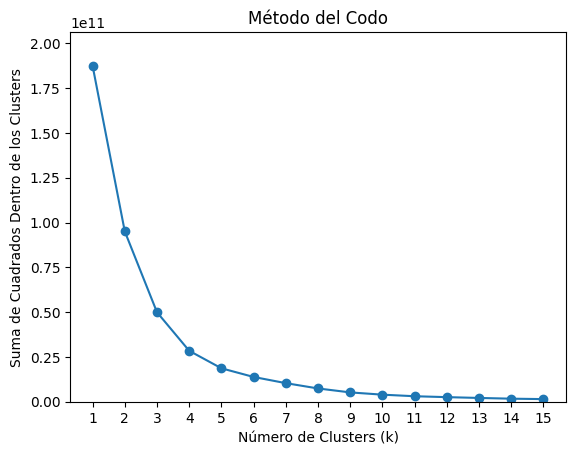

In [5]:
datos_transp = datos.transpose()
X = datos_transp.loc['views'].to_numpy().reshape(-1, 1) #tenemos que darle una de las columnas
inertia_values = [] # aqui se van a colocar los valores asociados a los clusters

# Prueba diferentes valores de k
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Grafica los resultados
plt.plot(range(1, 16), inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de Cuadrados Dentro de los Clusters')

# Ajusta el rango y la frecuencia de los números en el eje x
plt.xticks(range(1, 16))

# Establece los límites del eje y para mejorar la visualización
plt.ylim(bottom=0, top=max(inertia_values) * 1.1)

Notamos que hay un punto de inflexión localizado en el 4, por lo que esa sería la cantidad óptima de clusters a elegir.

Lo siguiente es aplicar el modelo KMeans con k=4 para obtener los centroides y las asignaciones de los puntos a los clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


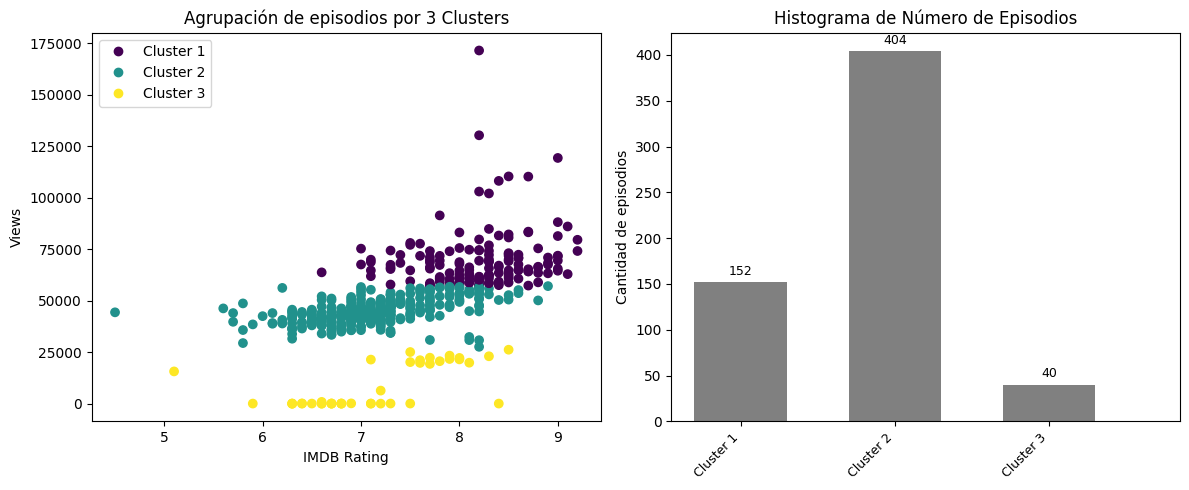

In [8]:
kmeans = KMeans(n_clusters=3)
datos['cluster'] = kmeans.fit_predict(datos[['number_in_series', 'imdb_rating', 'views']])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Grafico de dispersión
scatter = ax1.scatter(datos['imdb_rating'], datos['views'], c=datos['cluster'], cmap='viridis')
ax1.set_xlabel('IMDB Rating')
ax1.set_ylabel('Views')
ax1.set_title(f'Agrupación de episodios por {kmeans.n_clusters} Clusters')
legend_labels = [f'Cluster {i+1}' for i in range(kmeans.n_clusters)]
ax1.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper left')

# Histograma con etiquetas
cluster_hist = ax2.hist(datos['cluster'], bins=kmeans.n_clusters, color='grey', width=0.4)
ax2.set_ylabel('Cantidad de episodios')
ax2.set_title('Histograma de Número de Episodios')

# Agregar etiquetas de valores al histograma (arriba de las barras)
rects = ax2.patches
for rect, label in zip(rects, cluster_hist[0]):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height + 5, int(label),
             ha='center', va='bottom', fontsize=9)

# Ajustar el posicionamiento de las etiquetas en el eje x
xtick_positions = [rect.get_x() + rect.get_width() / 2 for rect in rects]
xtick_labels = [f'Cluster {i+1}' for i in range(kmeans.n_clusters)]

ax2.set_xticks(xtick_positions)
ax2.set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=9)

plt.tight_layout()
plt.show()
